# Challenge: Data Cleaning & Validation

In [1]:
#Imports
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data = pd.read_csv(open('WELLCOME_APCspend2013_forThinkful.csv','rU'), encoding='utf8', engine='c')
#data = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='latin')
data.head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


,PMID/PMCID,Publisher,Journal title,Article title,COST
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID       1928 non-null object
Publisher        2127 non-null object
Journal title    2126 non-null object
Article title    2127 non-null object
COST             2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


### Determine the five most common journals and total articles for each

In [4]:
#Pre-Data Clearning
data['Journal title'].value_counts().head(10)

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
PLoS Neglected Tropical Diseases                   18
Human Molecular Genetics                           18
Nature Communications                              17
PLoS Genetics                                      15
Neuroimage                                         15
Name: Journal title, dtype: int64

In [43]:
#Apply cleaning scripts
data['Journal title'] = data['Journal title'].str.upper()
data['Journal title'] = data['Journal title'].str.replace(',','')
data['Journal title'] = data['Journal title'].str.replace(':','')
data['Journal title'] = data['Journal title'].str.replace('.','')
data['Journal title'] = data['Journal title'].str.replace('&','AND')
data['Journal title'] = data['Journal title'].str.replace('BEHAVIOUR','BEHAVIOR')
data['Journal title'] = data['Journal title'].str.replace('BIOCHEMICAL','BIOCHEM')
data['Journal title'] = data['Journal title'].str.replace('JOURNALS','JOURNAL')
data['Journal title'] = data['Journal title'].str.replace('TROP MED INT HEALTH','TROPICAL MEDICINE AND INTERNATIONAL HEALTH')
data['Journal title'] = data['Journal title'].str.replace('NEUROSCIENCES','NEUROSCIENCE')
data['Journal title'] = data['Journal title'].str.replace('THE JOURNAL','JOURNAL')
data['Journal title'] = data['Journal title'].str.replace('PROC NATL ACAD SCI U S A','PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA')
data['Journal title'] = data['Journal title'].str.replace('PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF USA','PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA')
data['Journal title'] = data['Journal title'].str.replace('PNAS','PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA')
#data['Journal title'] = data['Journal title'].str.replace("PNAS (PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA",'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA')
data['Journal title'] = data['Journal title'].str.replace('PNAS USA','PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA')
data['Journal title'] = data['Journal title'].str.replace("PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES (PNAS)",'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA')
data['Journal title'] = data['Journal title'].str.replace("UNITED STATES OF AMERICA",'USA')
data['Journal title'] = data['Journal title'].str.strip()
data['Journal title'] = data['Journal title'].str.replace("PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES",'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA')
data['Journal title'] = data['Journal title'].str.replace("OF THE USA OF THE USA",'OF THE USA')

data['Journal title'] = data['Journal title'].str.replace("\(PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA",'')
data['Journal title'] = data['Journal title'].str.replace("\(",'')
data['Journal title'] = data['Journal title'].str.replace("\)",'')
data['Journal title'] = data['Journal title'].str.replace("USA USA",'USA')
data['Journal title'] = data['Journal title'].str.strip()

In [82]:
#Used the sort index to scroll through to look at the data to clean it. Also created a new dataframe
new_df = pd.DataFrame(data['Journal title'].value_counts())
new_df.columns=['Count']
#Typically wouldnt limit it, but added head() for viewing purposes.
new_df.sort_index().head()


,Count
ACADEMY OF NUTRITION AND DIETETICS,1
ACS CHEMICAL BIOLOGY,5
ACS CHEMICAL NEUROSCIENCE,1
ACS NANO,2
ACTA CRYSTALLOGRAPHICA SECTION D,1


In [45]:
#Top five journals after cleaning
new_df.head(5)

,Count
PLOS ONE,190
JOURNAL OF BIOLOGICAL CHEMISTRY,60
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE USA,37
NEUROIMAGE,29
NUCLEIC ACIDS RESEARCH,26


### Determing the mean, median, and Std

In [50]:
#In order to perform mathematical calculations have to remove items and convert to a float.
data['FCOST'] = data['COST'].str.replace('£','')
data['FCOST'] = data['FCOST'].str.replace('$','')
data['FCOST'] = data['FCOST'].apply(lambda x: float(x))

In [51]:
data.head(5)

,PMID/PMCID,Publisher,Journal title,Article title,COST,FCOST
0,NaN,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,£0.00,0.00
1,PMC3679557,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,£2381.04,2381.04
2,23043264 PMC3506128,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642.56
3,23438330 PMC3646402,ACS,J MED CHEM,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669.64
4,23438216 PMC3601604,ACS,J ORG CHEM,Regioselective opening of myo-inositol orthoes...,£685.88,685.88


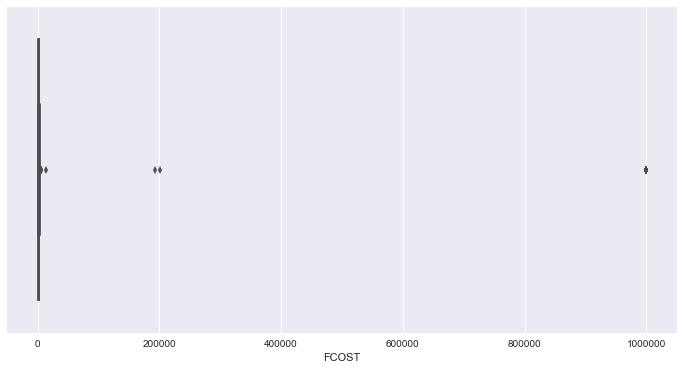

In [17]:
#Plot the FCOST Dataset as a box plot to see outliers.
plt.figure(figsize=(12,6))
sns.boxplot(data['FCOST'])

Notice there are outliers near the 1,000,000 range

In [81]:
#Want to create a dataframe that contains the count, mean, std.
#Used the describe method to do this
df = data.groupby('Journal title').describe().reset_index().pivot(index='Journal title', values='FCOST', columns='level_1')
df.head(10)

level_1,25%,50%,75%,count,max,mean,min,std
Journal title,,,,,,,,
ACADEMY OF NUTRITION AND DIETETICS,2379.5400,2379.540,2379.5400,1.0,2379.54,2379.540,2379.54,NaN
ACS CHEMICAL BIOLOGY,1267.7600,1294.590,1294.7800,5.0,2286.73,1418.186,947.07,507.309560
ACS CHEMICAL NEUROSCIENCE,1186.8000,1186.800,1186.8000,1.0,1186.80,1186.800,1186.80,NaN
ACS NANO,655.5150,668.140,680.7650,2.0,693.39,668.140,642.89,35.708892
ACTA CRYSTALLOGRAPHICA SECTION D,757.1800,757.180,757.1800,1.0,757.18,757.180,757.18,NaN
ACTA CRYSTALLOGRAPHICA SECTION D BIOLOGICAL CRYSTALLOGRAPHY,771.4200,771.420,771.4200,1.0,771.42,771.420,771.42,NaN
ACTA CRYSTALLOGRAPHICA SECTION D BIOLOGICAL CRYSTALLOGRAPHY,773.7400,773.740,773.7400,1.0,773.74,773.740,773.74,NaN
ACTA CRYSTALLOGRAPHICA SECTION F STRUCTURAL BIOLOGY AND CRYSTALLIZATION COMMUNICATIONS,791.1175,796.635,802.1525,2.0,807.67,796.635,785.60,15.605847
ACTA CRYSTALLOGRAPHY D,774.1900,774.190,774.1900,1.0,774.19,774.190,774.19,NaN


In [70]:
#This shows the Journals that has a huge price difference. Defined huge to be a std above 1000
df[df['std']>1000]

level_1,25%,50%,75%,count,max,mean,min,std
Journal title,,,,,,,,
BMC GENOMICS,1204.3800,1254.600,1476.0000,5.0,999999.00,200908.500000,608.52,446705.284994
CELL,3208.6900,3948.420,4163.8800,5.0,999999.00,202537.214000,1366.08,445796.050484
CEREBRAL CORTEX,1957.5000,2250.000,2400.0000,7.0,999999.00,144666.285714,1700.00,377166.376897
CURRENT BIOLOGY,3717.0400,3857.160,3938.1150,11.0,4112.54,3511.682727,348.33,1077.043187
DEVELOPMENTAL CELL,3428.6600,3861.420,3982.4175,12.0,4099.71,3292.271667,364.17,1253.021067
EMBO REPORTS,3120.0000,3120.000,501559.5000,3.0,999999.00,335413.000000,3120.00,575548.358999
ENDEAVOUR,1066.7175,1517.715,1968.7125,2.0,2419.71,1517.715000,615.72,1275.613562
GASTROENTEROLOGY,735.5600,1233.040,1730.5200,2.0,2228.00,1233.040000,238.08,1407.085926
GENETICS IN MEDICINE,252249.7500,501499.500,750749.2500,2.0,999999.00,501499.500000,3000.00,704984.753736


In [75]:
#Number of Journals
df.count()['25%']

852

The next best course of action would be to just use the median (50%) instead of the mean because the high value outliers are throwing off the statistics. Could also remove the "outliers" from the dataset. Can either just simply remove all Journals from the dataset that are above a certain value; or can be smarter about only removing outliers that have a count > 1. My concern with the first approach would be removing single Journals of this price. The better idea would be to remove outliers from within each Journal Group/.

In [72]:
#There are some outliers, so lets create a dataframe with those dropped. 
outliers_removed = data[data['FCOST']<5000]

In [73]:
#Create a Dataframe with the outlier removed statistics
outliers_removed_stats = outliers_removed.groupby('Journal title').describe().reset_index().pivot(index='Journal title', values='FCOST', columns='level_1')

In [76]:
#Number with just removing the raw outliers
outliers_removed_stats.count()['25%']

841

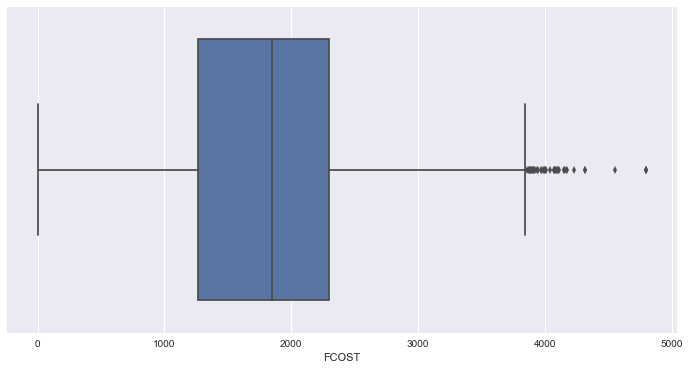

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(outliers_removed['FCOST'])

As you can see, by removing the Journals over $5000 meant that some Journals dropped off completely, and didnt solve the problem of just dropping the outlier within the grouping of Journals. 

#### Entire dataset statistics

Can do some more work to remove the outliers if needed. 

In [28]:
#Mean
print('Mean with outliers: ' + str(data['FCOST'].mean()))
print('Mean without outliers: ' + str(outliers_removed['FCOST'].mean()))

Mean with outliers: 24067.33997179131
Mean without outliers: 1818.144636144582


In [29]:
#Median
print('Median with outliers: ' + str(data['FCOST'].median()))
print('Median without outliers: ' + str(outliers_removed['FCOST'].median()))

Median with outliers: 1884.01
Median without outliers: 1851.15


In [30]:
#STD
print('STD with outliers: ' + str(data['FCOST'].std()))
print('STD without outliers: ' + str(outliers_removed['FCOST'].std()))

STD with outliers: 146860.6655590476
STD without outliers: 757.641628388014


## Challenge

In [51]:
#Didnt attempt challenge. Its kind of vague.
data['Journal title'].value_counts()

PLoS One                                                                92
PLoS ONE                                                                62
Journal of Biological Chemistry                                         48
Nucleic Acids Research                                                  21
Proceedings of the National Academy of Sciences                         19
PLoS Neglected Tropical Diseases                                        18
Human Molecular Genetics                                                18
Nature Communications                                                   17
Neuroimage                                                              15
PLoS Genetics                                                           15
PLoS Pathogens                                                          15
BMC Public Health                                                       14
PLOS ONE                                                                14
NeuroImage               

In [ ]:
#What is meant by subject?
